<a href="https://colab.research.google.com/github/gioalvarino/Bootcamp-Santander-Coders/blob/main/04_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto final

Utilizar dados de uma Api pública com dados da covid 19 e fazer algumas análises através de gráficos.


In [58]:
# Importando a biblioteca
import requests as r

In [59]:
# Declarando a API através da url
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

resp.status_code

200

In [60]:
# Guardando os dados retornados pela Api em uma variável
raw_data = resp.json()

raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [61]:
# Criando um novo df, apenas com as variáveis de interesse para a análise
final_data = []
for obs in raw_data:
  final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [62]:
# Criando um cabeçalho e nomeando as colunas para o pt
final_data.insert(0,['Confirmados','Obitos','Recuperados','Ativos','Data'])

In [63]:
CONFIRMADOS = 0
OBITOS = 1 
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [64]:
# Formatando a data
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

In [65]:
#Criando um arquivo csv para guardar estes dados
import csv

with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [66]:
# Alterando o formato da data através do pacote datatime
import datetime as dt

for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

## Gráfico

In [96]:
# Função que define os dados

def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
                })
        return datasets
    else:
        return [
            {
                'label':labels[0],
                'data': y
            }
        ]  

In [97]:
# Função que define o título do gráfico

def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [86]:
# Função que cria o dicionário que representa o gráfico

def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type' : kind,
        'data' : {
            'labels': x,
            'datasets' : datasets
        },
        'options' : options
    }
    
    return chart

In [98]:
# Função que faz a requisição na Api utilizando o dicionário criado acima

def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [99]:
# Função que salva a imagem criada acima

def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [100]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
# Função que mostra a imagem criada acima

from PIL import Image
from IPython. display import display

def display_image(path):
  img_pil = Image.open(path)
  display(img_pil)

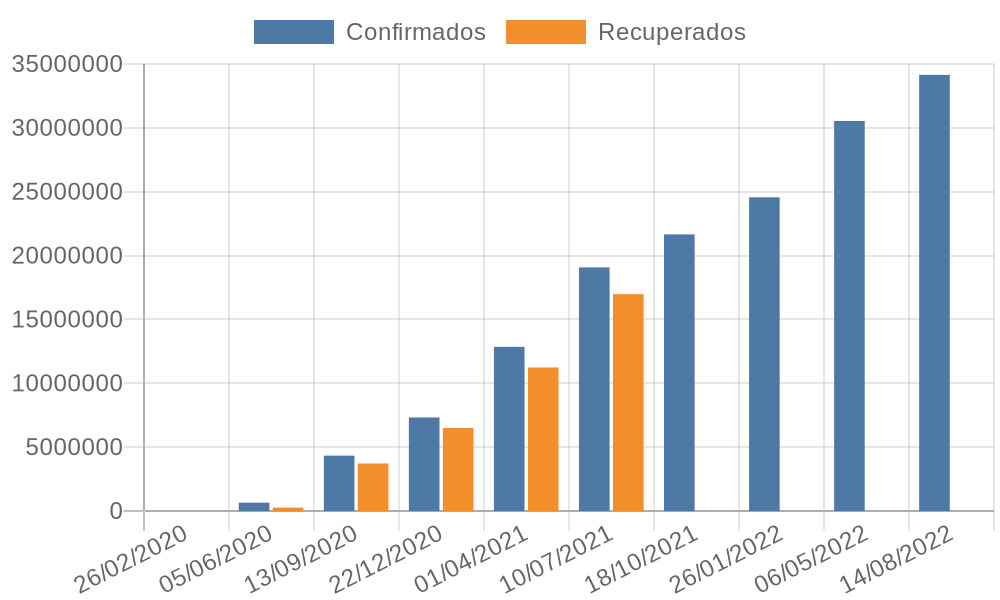

In [107]:
y_data_1 = []
for obs in final_data[1::100]:
    y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::100]:
    y_data_2.append(obs[RECUPERADOS])
    
labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::100]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [114]:
# Função para criar um qrcode do gráfico acima

from urllib.parse import quote

def get_api_qrcode(link):
    text = quote(link) # parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

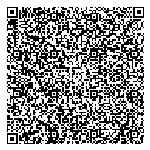

In [115]:
# Criando um qrcode do gráfico acima

url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')